In [2]:
import pandas as pd
import random
import numpy as np
from tqdm import tqdm
import re
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from serialize import deserialize_str,SerializerSettings
import matplotlib.pyplot as plt
from statistics import mean
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
from datasets import load_dataset
settings =SerializerSettings(base=10, prec=3, signed=True, time_sep=', ', bit_sep=' ')


C:\Users\Petro\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
def plot_time_series(series1, series2,path,name,mse,mae):
    """
    Plot two time series arrays.
    
    Args:
    series1 (list or numpy array): First time series data.
    series2 (list or numpy array): Second time series data.
    """
    # Generate time indices
    time_indices = list(range(1, len(series1) + 1))
   
    # Plot time series
    plt.figure(figsize=(10, 6))
    plt.plot(time_indices, series1, label='Model')
    plt.plot(time_indices, series2, label='gt')
    
    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(name+" mse:"+str(mse)+" mae:"+str(mae))
    plt.ylim(-25, 180)
    plt.legend()
    #plt.text(0.5, 0.5,str(mse), fontsize=14, transform=plt.gcf().transFigure)
    
    #Show plot
    plt.grid(True)

    path= path +"\\"+ name + ".png"
    plt.savefig(path)
    #plt.show

In [1]:
enc_df = pd.read_pickle("encoded/test_results.pkl")
path = "encoded/Encoded_final_test_dataset.json"

enc_dataset = load_dataset("json", data_files=path, split="train")



NameError: name 'pd' is not defined

In [4]:
i= 0

In [5]:
output =deserialize_str(enc_dataset["output"][i],settings)
input = deserialize_str(enc_dataset["input"][i],settings)

In [6]:
input[-200:]

array([ 1.17205e+01,  1.31285e+01,  1.28595e+01,  1.53385e+01,
        1.62085e+01,  1.65445e+01,  1.50695e+01,  1.56735e+01,
        1.48695e+01,  1.70135e+01,  1.14545e+01,  9.37650e+00,
        5.29050e+00,  2.94750e+00, -5.76050e+00, -9.57850e+00,
       -1.24585e+01, -1.17205e+01, -9.71150e+00, -4.15250e+00,
       -1.87450e+00,  4.48750e+00,  9.37650e+00,  1.09185e+01,
        1.28595e+01,  1.25245e+01,  1.22565e+01,  1.72145e+01,
        1.76155e+01,  1.66775e+01,  1.55385e+01,  1.51375e+01,
        1.27935e+01,  1.61425e+01,  1.24585e+01,  9.31050e+00,
        6.16250e+00, -2.94750e+00, -7.43450e+00, -1.16545e+01,
       -1.53385e+01, -1.40655e+01, -1.01805e+01, -5.89450e+00,
       -2.94750e+00,  2.27650e+00,  8.77450e+00,  8.57250e+00,
        1.03145e+01,  1.05835e+01,  1.17885e+01,  1.63435e+01,
        1.62085e+01,  1.63435e+01,  1.62085e+01,  1.56055e+01,
        1.71465e+01,  1.68785e+01,  1.34635e+01,  1.05835e+01,
        7.36850e+00,  2.07550e+00, -9.17550e+00, -5.559

In [7]:
arr = np.full((200),np.nan)


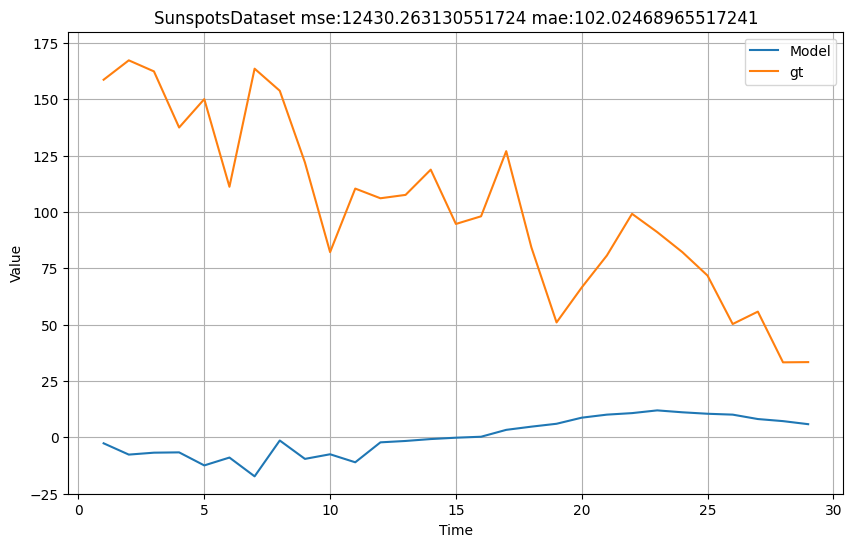

In [22]:
v= 0
for i in range(25,26):
    if v == 6:
        v = 0

    mae_value     = mean_absolute_error(enc_df["answer"][i],deserialize_str(enc_dataset["output"][i],settings))
    mape = mean_absolute_percentage_error(enc_df["answer"][i],deserialize_str(enc_dataset["output"][i],settings))
    value_mse = mean_squared_error(enc_df["answer"][i],deserialize_str(enc_dataset["output"][i],settings))
    
    
    output =deserialize_str(enc_dataset["output"][i],settings)
    
    input = deserialize_str(enc_dataset["input"][i],settings)
    
    if "ETT" in enc_dataset["dataset_name"][i]:
        prediction = np.append(arr,enc_df["answer"][i])
        appendout= np.append(input[-200:],output)
        plot_time_series(prediction,appendout,"encoded",enc_dataset["dataset_name"][i]+str(v),value_mse,mae_value)
    else:
        plot_time_series(enc_df["answer"][i],output,"encoded",enc_dataset["dataset_name"][i],value_mse,mae_value)
    v = v +   1    
    

In [ ]:
len(prediction)

In [ ]:
enc_df["dataset_name"][24]